In [1]:
%matplotlib inline


# Points Moving Average
Investigate Points Moving Average


In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Downloading data
For our task we will download the data from [Football-Data](https://football-data.co.uk/) with match scores from 
the English Premier League since Pep Guardiona began to coach Manchester City. Here, we download the data, save it in 
a dataframe and append to list and then store them in one big dataframe.



In [15]:
#list of dataframes
dflist = []
#list of all seasons, we'll use them later
seasonst = []
#taking to last year because United hasn't played yet when I'm doing this code
for year in range(16,22,1):
    #create a string with season name
    if year<9:
        yeartext='0'+str(year)+'0'+str(year+1)
        yeartext2='0'+str(year)+'-0'+str(year+1)
    elif year==9:
        yeartext='0910'
        yeartext2='09-10'
    else:
        yeartext=str(year)+str(year+1)
        yeartext2=str(year)+'-'+str(year+1)
    #get data from webpage
    performance_year = pd.read_csv("https://www.football-data.co.uk/mmz4281/"+yeartext+"/E0.csv",delimiter=',') 
    #append season name
    seasonst.append(yeartext2)
    #make list of dataframes
    dflist.append(performance_year)
#put dataframes into one big
performance = pd.concat(dflist).reset_index()

In [16]:
performance.tail()

,index,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
2275,375,E0,22/05/2022,Crystal Palace,Man United,1,0,H,1,0,...,2.04,0.25,1.68,2.15,1.74,2.23,1.88,2.25,1.74,2.16
2276,376,E0,22/05/2022,Leicester,Southampton,4,1,H,0,0,...,2.63,-0.75,1.83,2.07,1.88,2.03,1.94,2.26,1.87,2.01
2277,377,E0,22/05/2022,Liverpool,Wolves,3,1,H,1,1,...,3.28,-2.50,2.02,1.77,2.06,1.83,2.19,1.99,2.07,1.80
2278,378,E0,22/05/2022,Man City,Aston Villa,3,2,H,0,1,...,3.36,-2.25,2.06,1.84,2.05,1.86,2.09,2.03,2.01,1.87
2279,379,E0,22/05/2022,Norwich,Tottenham,0,5,A,0,2,...,2.40,1.50,1.95,1.95,1.96,1.94,2.16,1.98,1.99,1.89


## Preparing data
We want to investigate Pep Guardiola's City performance against other TOP6 clubs performance in this period.
For each of these teams, we get games played by them and assign number of points that they scored. Then, we calculate
the 10 game points rolling average. Feel free to experiment with window size and check how the diagram changes!  



In [17]:
#top6 teams
teams = ['Man City', 'Liverpool', 'Arsenal', 'Chelsea', 'Tottenham', 'Man United']

#dictionary to store data
team_dfs = dict()
for team in teams:
    #empty dataframe
    team_df = pd.DataFrame(columns = ["Points", "Date", "Game"])
    #get matches by this team 
    matches = performance.loc[(performance['AwayTeam'] == team) | (performance['HomeTeam'] == team)]
    #auxilliary variable that will be helpful to plot
    game = 0
    for i, match in matches.iterrows():
        game +=1
        #if team was away
        if match['AwayTeam'] == team:
            #get goals for both teams 
            goalsfor = match['FTAG']
            goalsagainst = match['FTHG']
            #assign 3 points if win, 1 if draw, 0 if lost
            if match['FTR'] == 'A':
                points = 3
            elif match['FTR'] == 'D':
                points = 1
            else:
                points = 0
        else:
            #geat goals for both teams
            goalsfor = match['FTHG']
            goalsagainst = match['FTAG']
            #assign 3 points if win, 1 if draw, 0 if lost
            if match['FTR'] == 'H':
                points = 3
            elif match['FTR'] == 'D':
                points = 1      
            else:
                points = 0
                #assign value to dataframe
        team_df.at[i, "Points"] = points
        team_df.at[i, "Game"] = game
    #calculate rolling average   
    team_df['PointsRA'] = team_df['Points'].rolling(window=10, win_type='triang').mean()
    #append df
    team_dfs[team] = team_df

In [18]:
team_df

,Points,Date,Game,PointsRA
8,3,NaN,1,NaN
10,3,NaN,2,NaN
23,3,NaN,3,NaN
34,0,NaN,4,NaN
49,0,NaN,5,NaN
...,...,...,...,...
2221,0,NaN,224,1.36
2231,1,NaN,225,1.16
2241,3,NaN,226,1.12
2246,0,NaN,227,1.10


## Making plot
After calculating the rolling average, we can plot our data. Make sure that you understand the lines below!



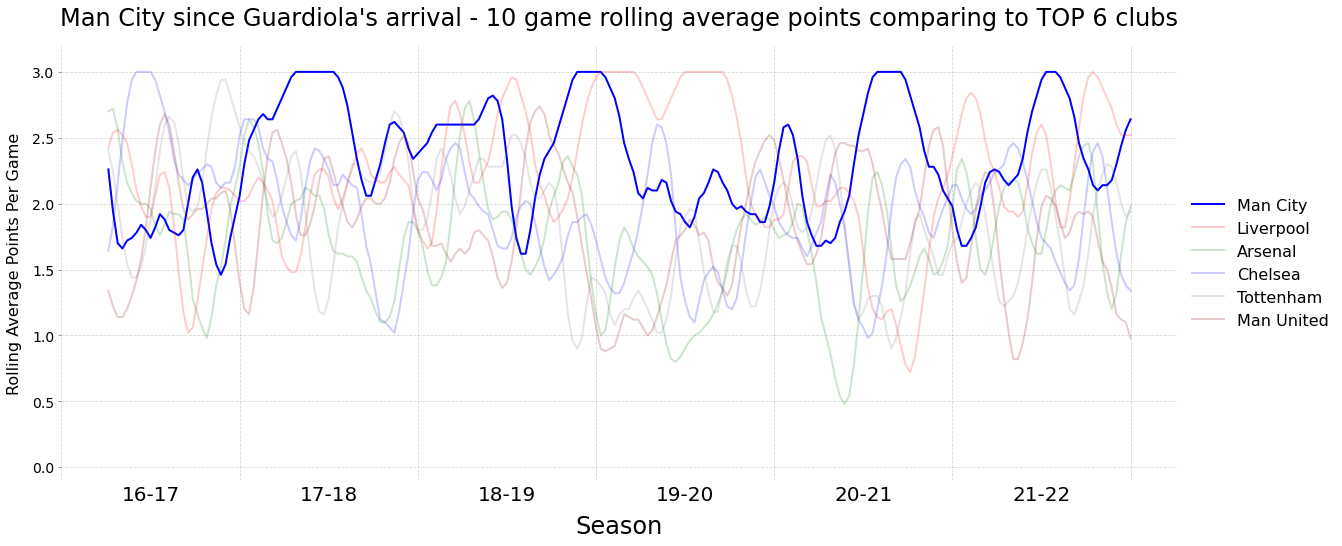

In [19]:
#create plot 
fig, ax = plt.subplots(figsize=(20, 8))
#arsenal got yellow because of those 2004 kits, but it was invisible so they got green  
colors = ['blue', 'red', 'green', 'blue', 'grey', 'darkred']
#city highlighted more
alphas = [1, 0.2, 0.2, 0.2, 0.2, 0.2]
for club, color, alpha in zip(teams, colors, alphas):
    ax.plot(team_dfs[club]['Game'],  team_dfs[club]['PointsRA'], linewidth=2, linestyle='-',color=color, alpha = alpha, zorder = 2, label = club)

#set title
ax.set_title("Man City since Guardiola's arrival - 10 game rolling average points comparing to TOP 6 clubs", fontsize = 24, pad=20)
#make visible ticks for beginning of each season
ax.set_xticks(np.arange(0, max(team_dfs["Liverpool"]['Game']) + 38, 38))
#no text
ax.set_xticklabels([])
#make ticks in the middle
ax.set_xticks(np.arange(0, max(team_dfs["Liverpool"]['Game']), 38) + 19, minor=True)
#put season text in the middle of season
ax.set_xticklabels(seasonst, minor=True)
#set axis limits
ax.set_xlim(0, max(team_dfs["Liverpool"]['Game']) + 10)
ax.set_ylim(-0.1,3.2)
#disable black ticks, but big text xaxis
ax.tick_params(axis='x', color='white', which='both', labelsize = 20)
#grey y ticks
ax.tick_params(axis='y', color='grey', labelsize = 14)
#add grid
ax.grid(zorder = 1, linestyle = "--", alpha = 0.5)
#disable spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#add axis labels
ax.set_ylabel('Rolling Average Points Per Game', fontsize = 16,labelpad=10)
ax.set_xlabel('Season', fontsize = 24, labelpad=10)
#make legend
plt.legend(bbox_to_anchor=(1.0, 0.5), loc="center left",fontsize=16, edgecolor='white')
plt.show()

## Challenge
1. Improve so that the rolling average is calculated for each season independently!
2. Make this plot for Norwich and account for their relegations!
